# Problem Statement:

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("Company_Data.csv")

# Data Exploration

In [3]:
df.shape

(400, 11)

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
df.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
45,4.56,141,63,0,168,135,Bad,44,12,Yes,Yes
83,4.42,109,36,7,468,94,Bad,56,11,Yes,Yes
38,6.59,109,73,0,454,102,Medium,65,15,Yes,No
224,4.10,134,82,0,464,141,Medium,48,13,No,No
272,12.98,113,33,0,14,63,Good,38,12,Yes,No


### Quick Data Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Statistical Summary

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [10]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []


In [11]:
df[df.duplicated()].shape

(0, 11)

- There is no duplicate values present in dataset.

### Identifying Missing Values

In [12]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

- There is no missing values in dataset

### Identifying Outliers

<Axes: >

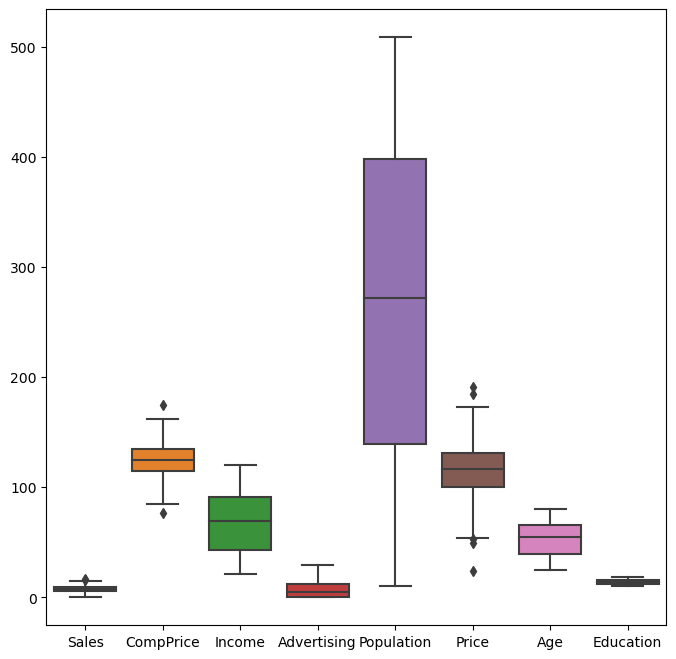

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)

# Data Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

### Data Type Conversion 

In [15]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


# Data Visualization

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


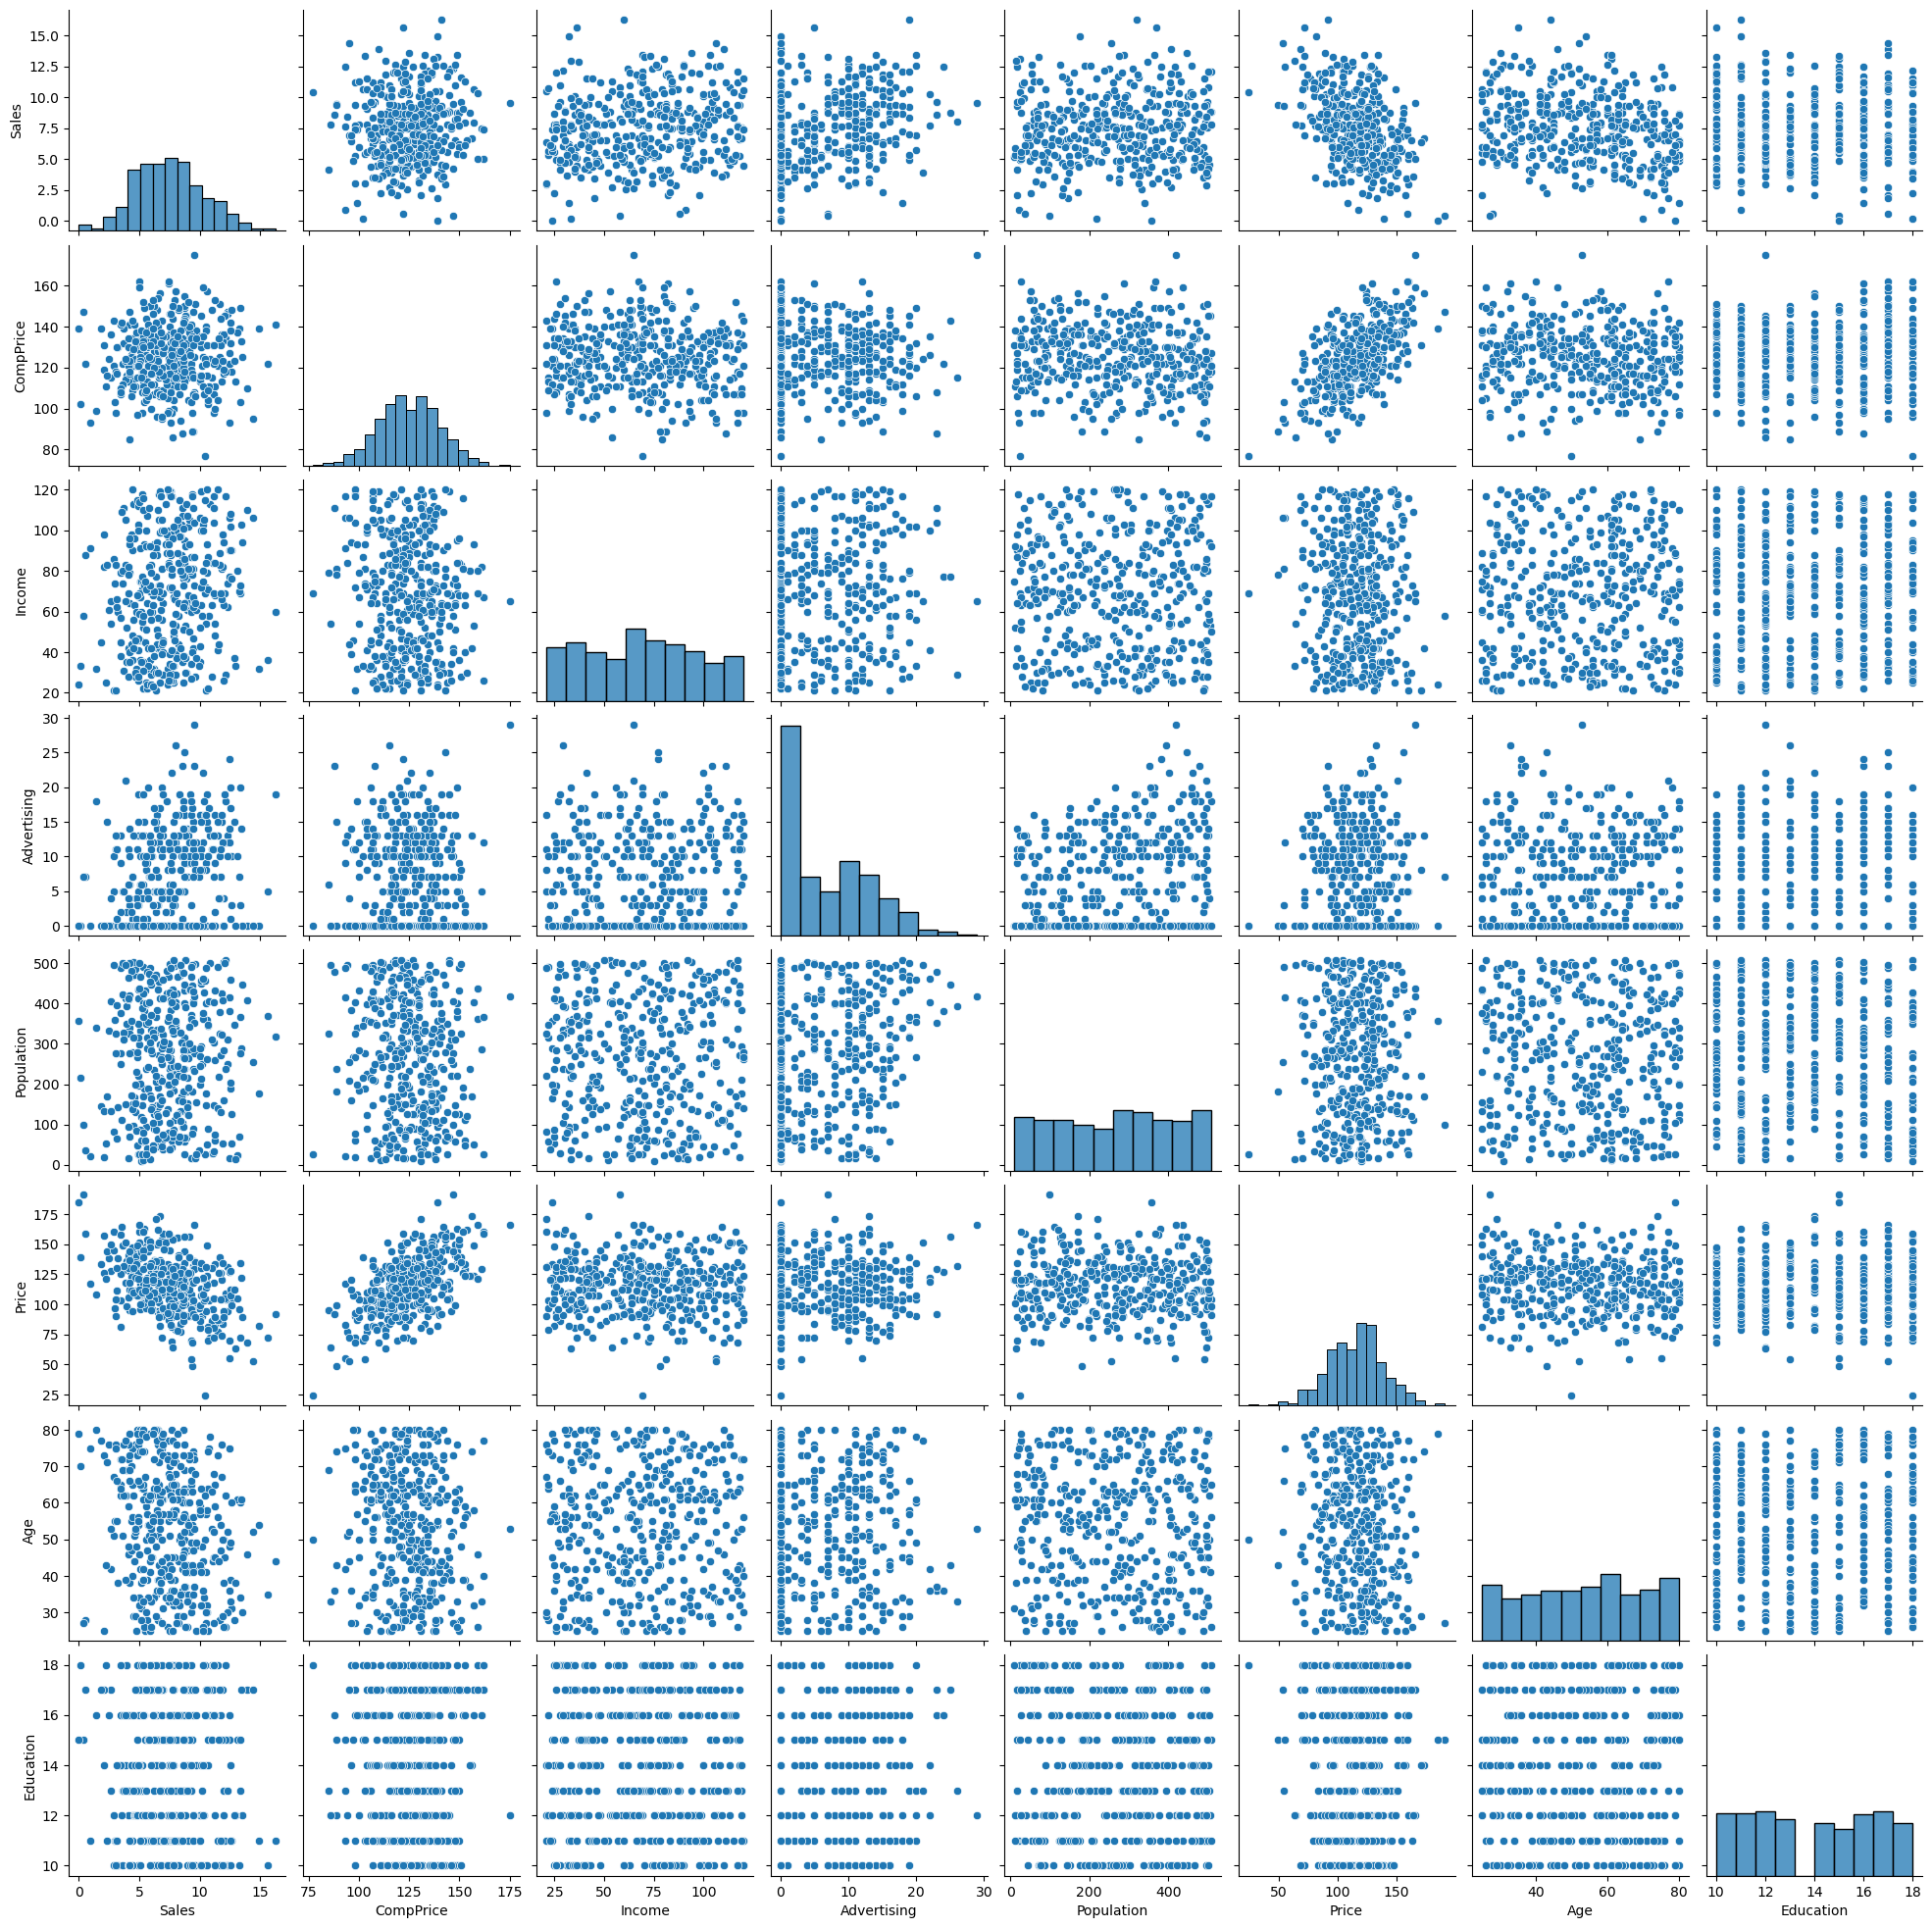

In [18]:
sns.pairplot(df);

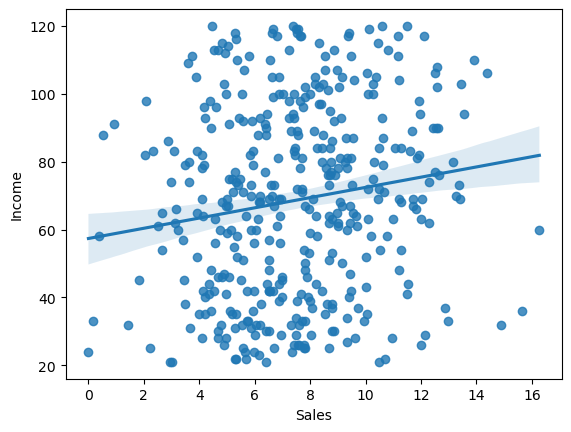

In [19]:
sns.regplot(data=df, x='Sales',y='Income');

- The scatter plot shows a positive correlation between Income and Sales.
- This means that, in general, as the Sales values increase, the Income values also tend to increase.

C:\Users\vijay\AppData\Local\Temp\ipykernel_24928\2207781532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")


<Axes: >

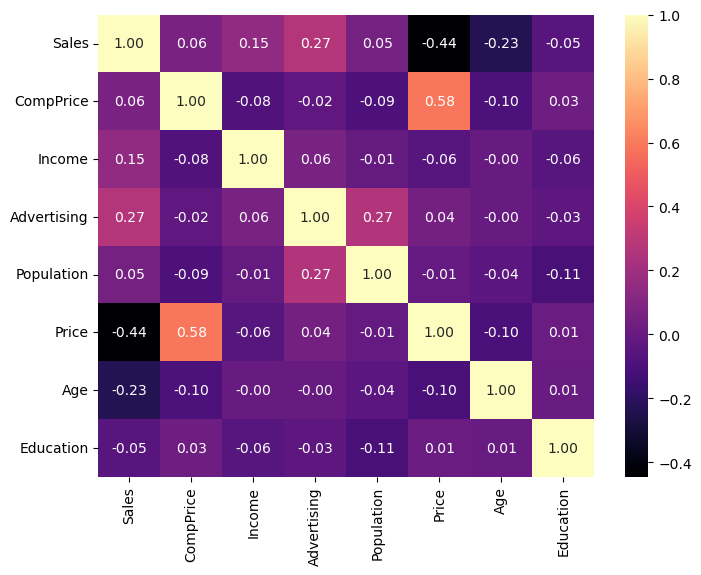

In [20]:
plt.figure(figsize = (8, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")

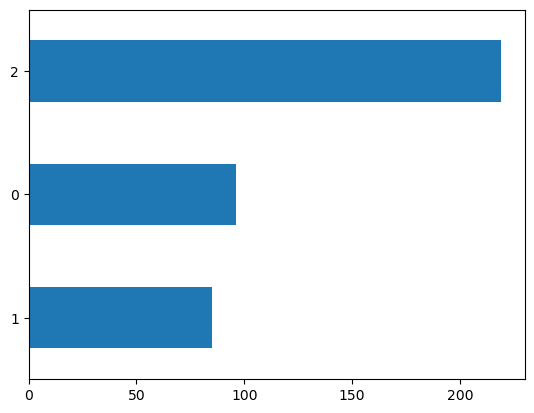

In [21]:
df.ShelveLoc.value_counts(ascending=True).plot(kind='barh');

In [22]:
import ppscore as pps
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


In [23]:
pps.score(df, "Sales", "Income")

{'x': 'Sales',
 'y': 'Income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 23.6325,
 'model_score': 30.317083333333333,
 'model': DecisionTreeRegressor()}

- For continous variable we are going to use Regressor for this dataset

# Data Splitting

In [24]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (320, 10)
Shape of X_test:  (80, 10)
Shape of y_train:  (320,)
Shape of y_test: (80,)


# Model Selection - Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtregmodel = DecisionTreeRegressor()

In [29]:
dtregmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
y_pred = dtregmodel.predict(X_test)
y_pred

array([ 4.42,  3.13, 12.85,  5.17,  9.08,  5.17, 11.48,  8.01, 12.13,
       10.98,  5.58, 10.07,  8.68,  7.54,  6.2 ,  9.34,  8.19, 11.96,
        6.81,  5.58,  9.64,  0.16,  7.96,  4.67, 10.14,  7.78,  4.12,
        4.42,  9.  ,  4.1 , 12.29, 10.49,  5.21,  5.42, 10.49,  2.93,
        5.31,  6.89,  9.09,  6.15,  3.13,  8.54,  8.41, 10.  , 10.61,
        6.71,  5.3 ,  7.41,  2.67,  4.2 ,  8.64,  8.57,  5.36, 12.29,
        9.62,  2.05,  6.71, 12.29, 11.99,  7.02,  7.8 , 11.54, 11.67,
        4.78,  7.95,  9.  ,  8.21,  6.43,  6.8 ,  8.77,  6.62,  9.  ,
       11.67,  1.82, 11.18, 11.67,  6.92,  8.03,  6.62,  6.62])

# Model Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.9449999999999998
Mean Squared Error (MSE): 6.1923699999999995
Root Mean Squared Error (RMSE): 2.488447307057154
R-squared (R2): 0.3742680578962423


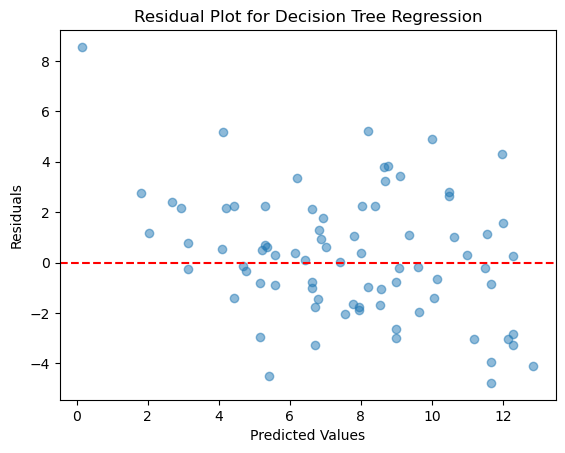

In [33]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

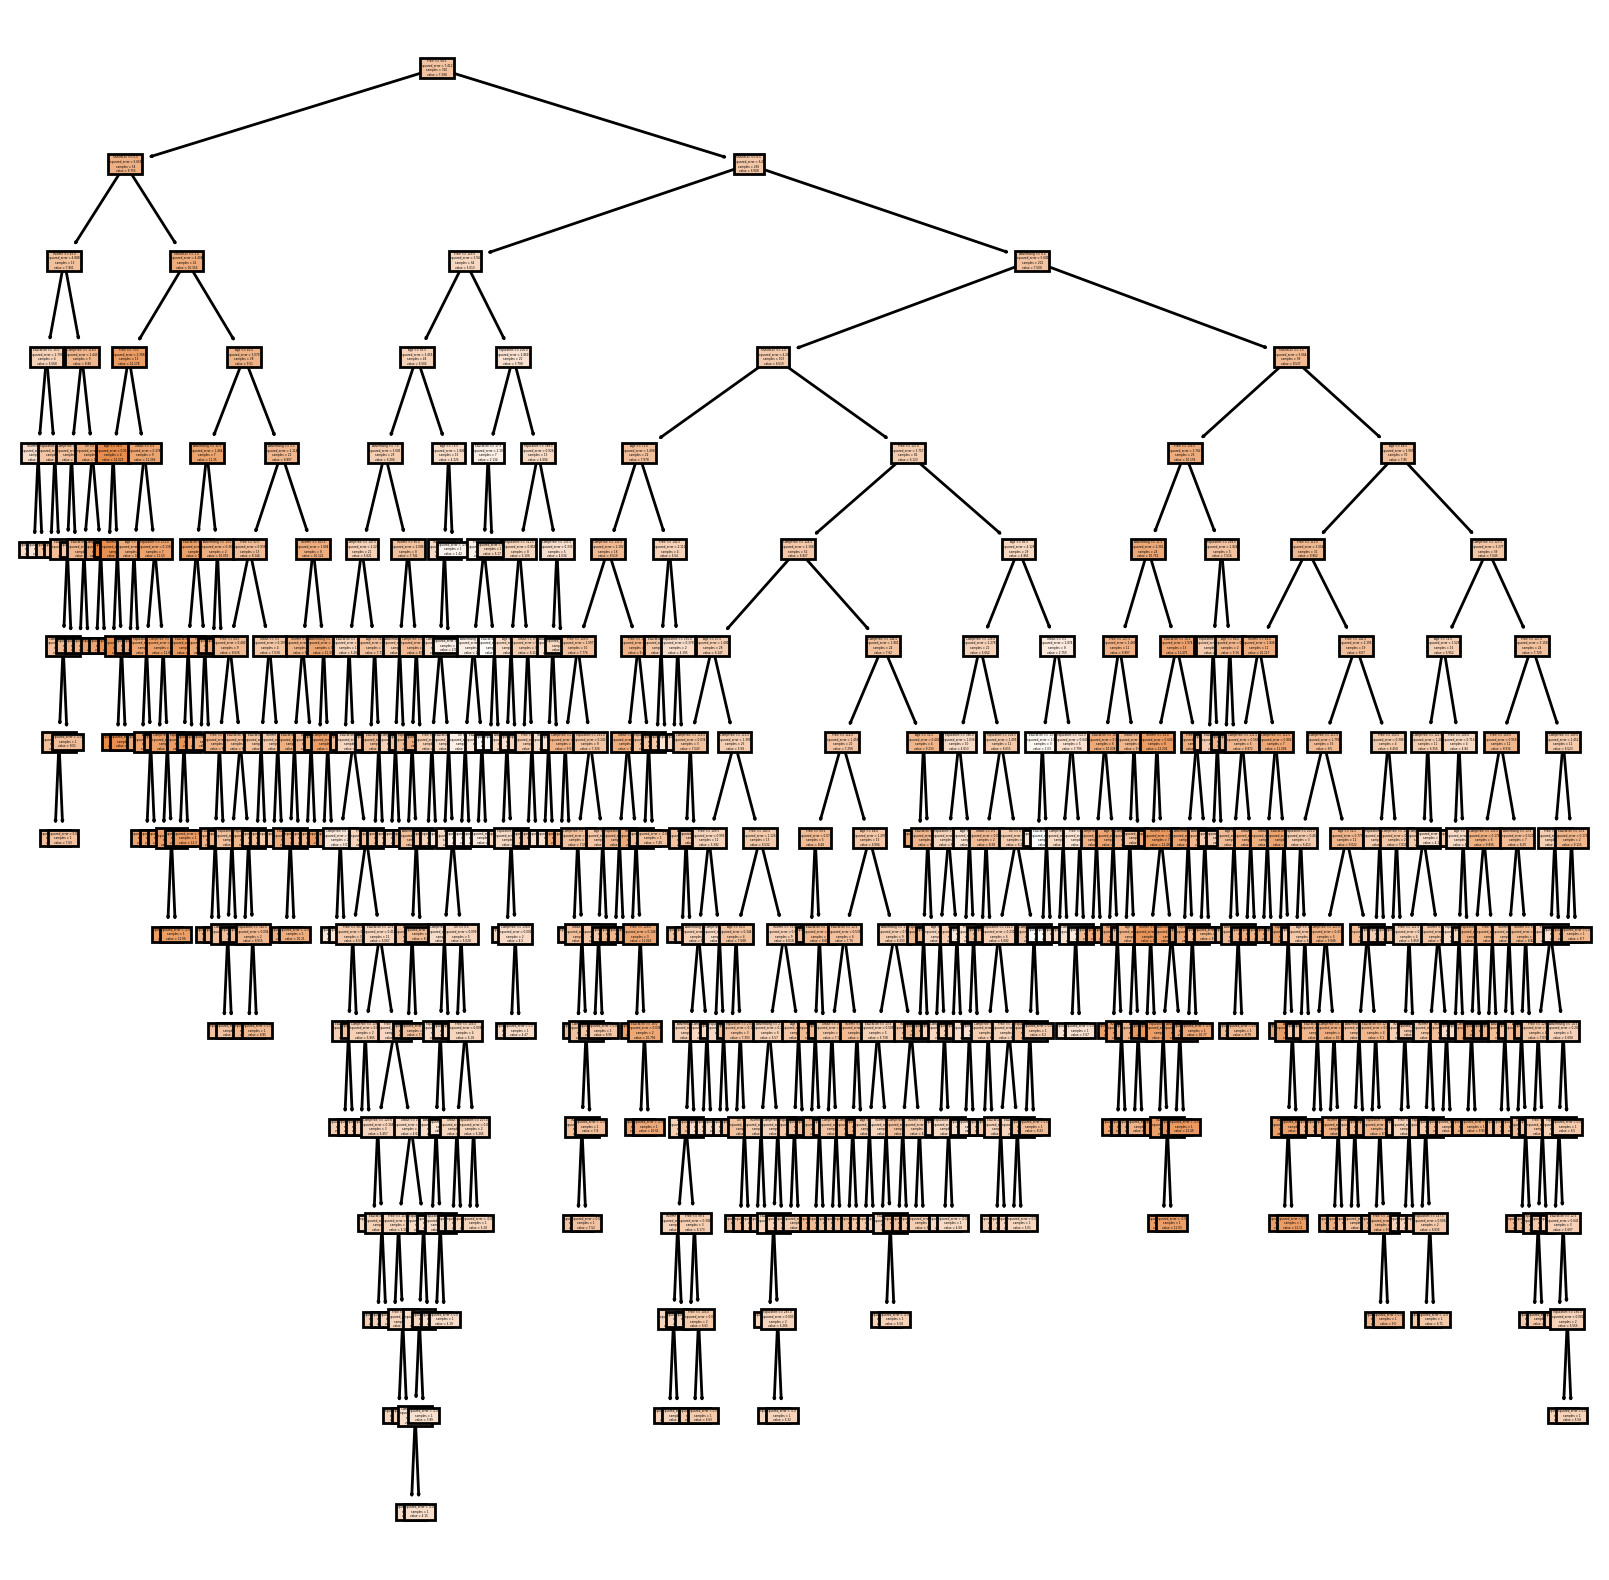

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10),dpi=200)
plot_tree(dtregmodel,filled=True,feature_names=X.columns.tolist());

# Classification

In [35]:
df = pd.read_csv("Company_Data.csv")

In [36]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

## Converting Numerical Feature into Categorical

In [37]:
def Tagging(sale):
    if sale>= 7.5:
        return "High"
    else:
        return "Low"

In [38]:
df['Sales']=df['Sales'].apply(Tagging)

In [39]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


### Encoding

In [40]:
Objectcol = df.select_dtypes(object).columns
Objectcol

Index(['Sales', 'ShelveLoc', 'Urban', 'US'], dtype='object')

In [41]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [42]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


# Data Splitting

In [43]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (320, 10)
Shape of X_test:  (80, 10)
Shape of y_train:  (320,)
Shape of y_test: (80,)


# Model Selection - Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier()

In [48]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

# Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer

In [51]:
accuracy_score(y_test, y_pred)

0.7125

In [52]:
confusion_matrix(y_test, y_pred)

array([[33, 10],
       [13, 24]], dtype=int64)

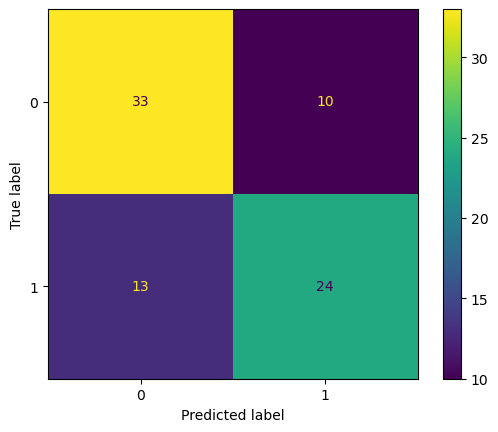

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        43
           1       0.71      0.65      0.68        37

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



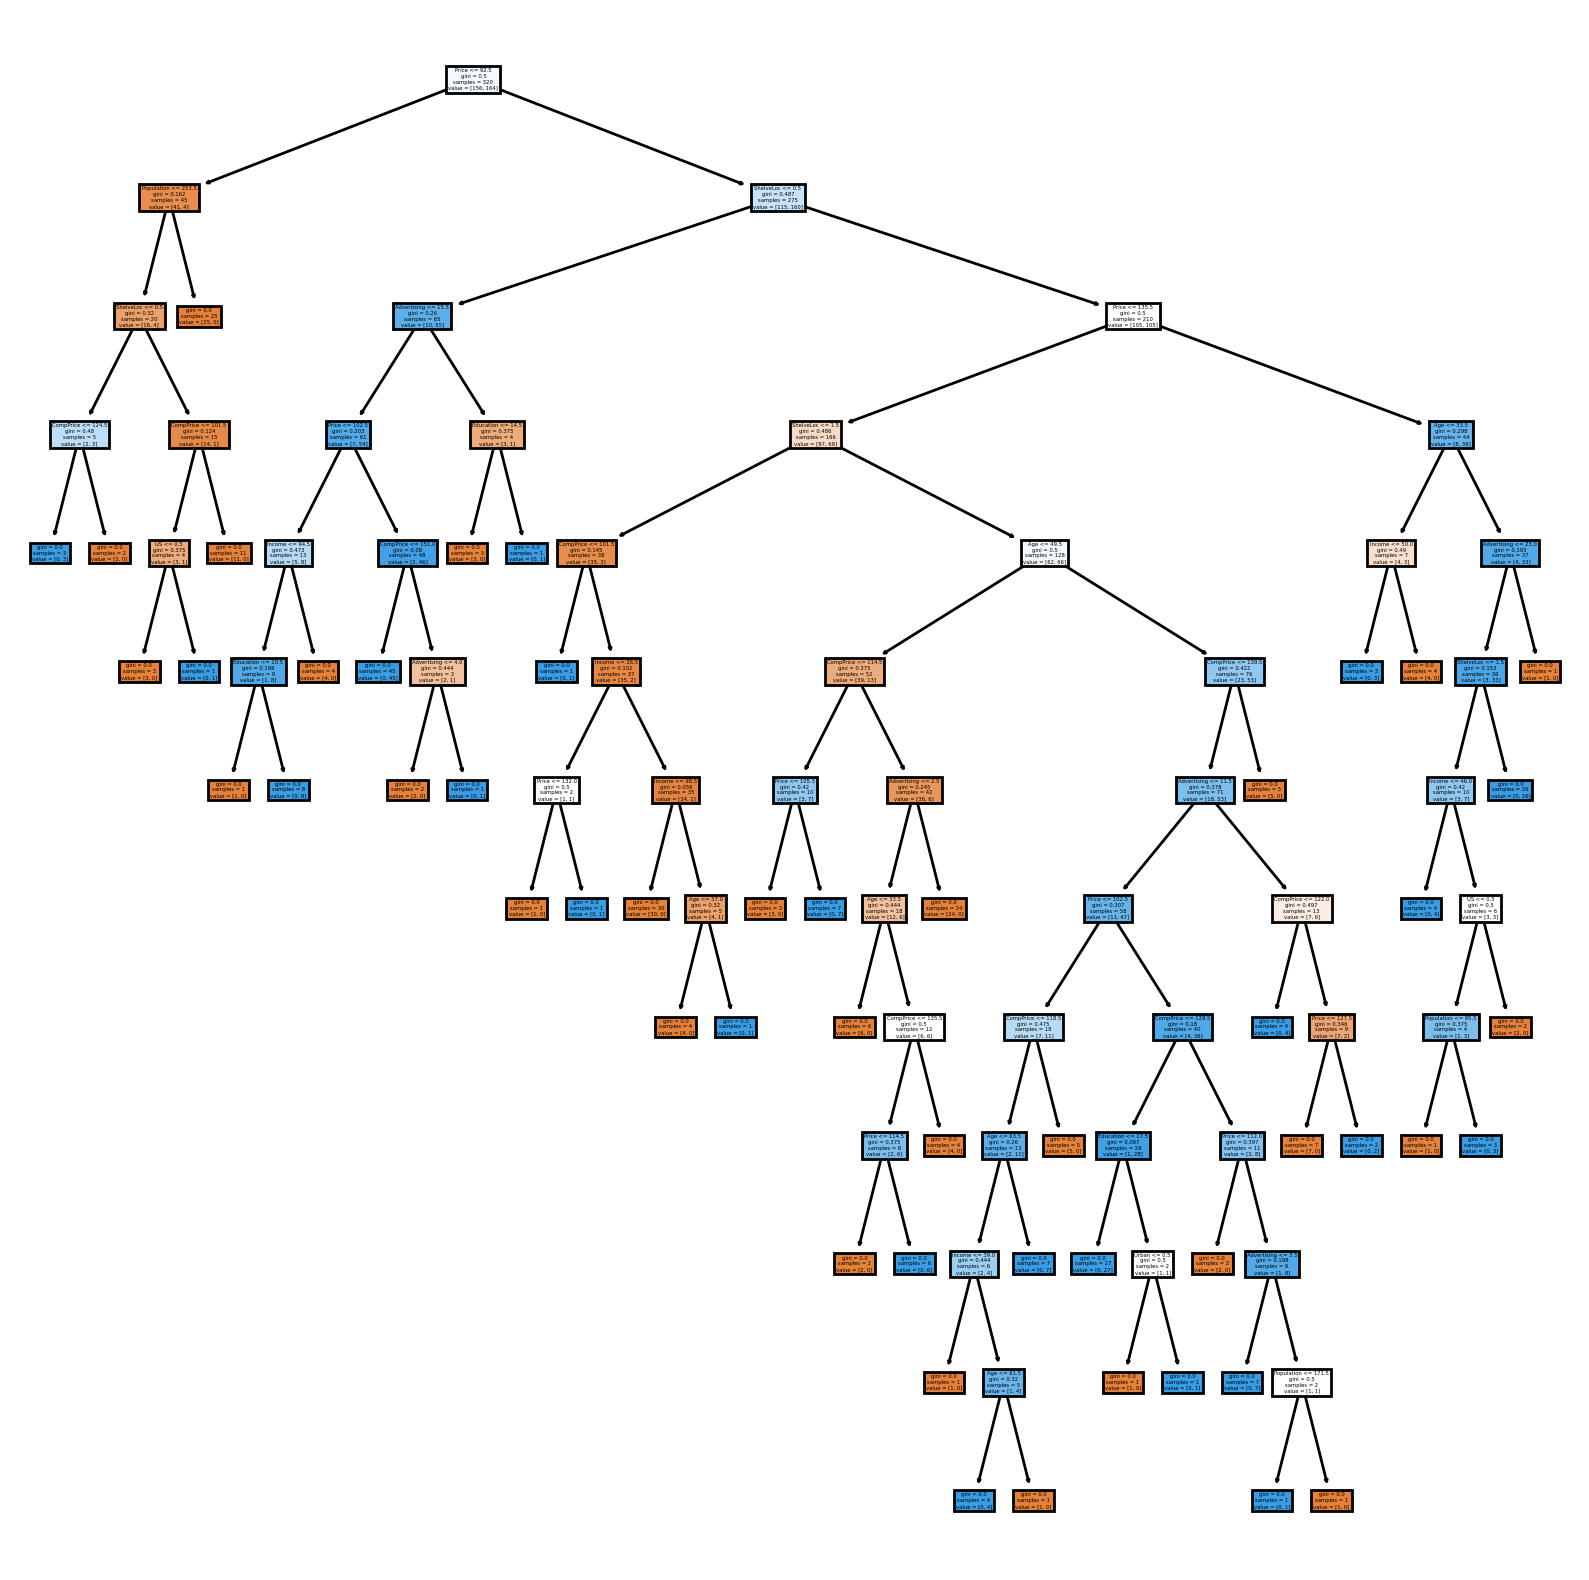

In [55]:
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model, filled=True, feature_names=X.columns.tolist());

In [56]:
def report_model(model):
    """
    Generates and prints various reports to evaluate a trained model.
    Args:
        model: The trained model object.
    """

    # Make predictions on the test set
    model_preds = model.predict(X_test)

    # Calculate accuracy scores on training and test sets
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Print training and test accuracy scores
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print()

    # Generate and print confusion matrix with annotations
    print("Confusion Matrix:")
    print(sns.heatmap(confusion_matrix(y_test, model_preds), annot=True))

    # Generate and print classification report
    print("Classification Report:")
    print(classification_report(y_test, model_preds))
    print()

    # Create a figure for plotting the decision tree
    plt.figure(figsize=(12, 8), dpi=150)

    # Plot the decision tree with filled nodes and feature names
    plot_tree(model, filled=True, feature_names=X.columns.tolist());


Training Accuracy: 0.8438
Test Accuracy: 0.7000

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        43
           1       0.67      0.70      0.68        37

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80




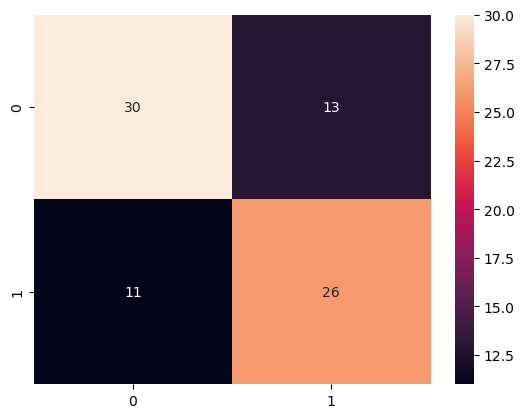

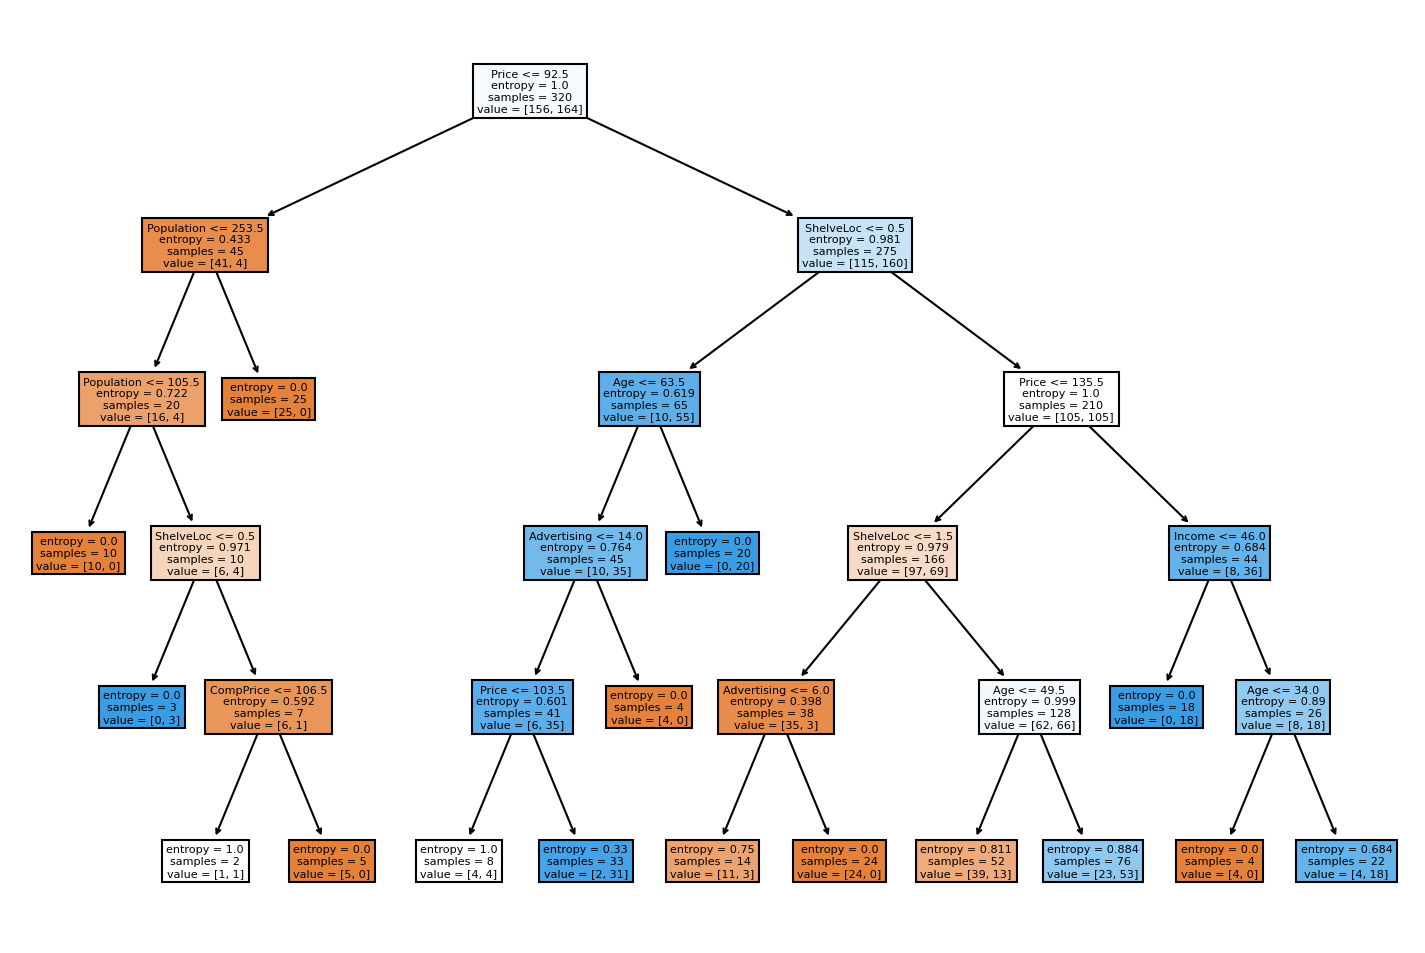

In [57]:
pruned_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}


grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=10, n_jobs=-1, verbose=3)

In [60]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [61]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3)

Training Accuracy: 0.9437
Test Accuracy: 0.7250

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.70      0.70      0.70        37

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80




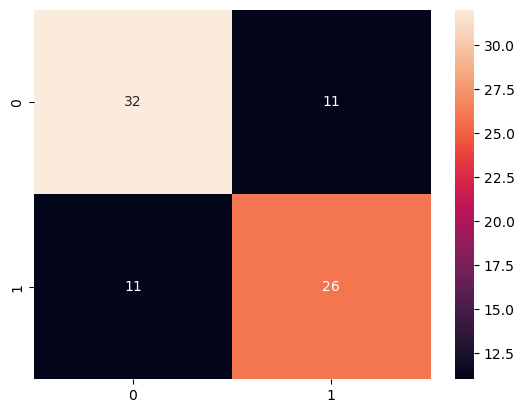

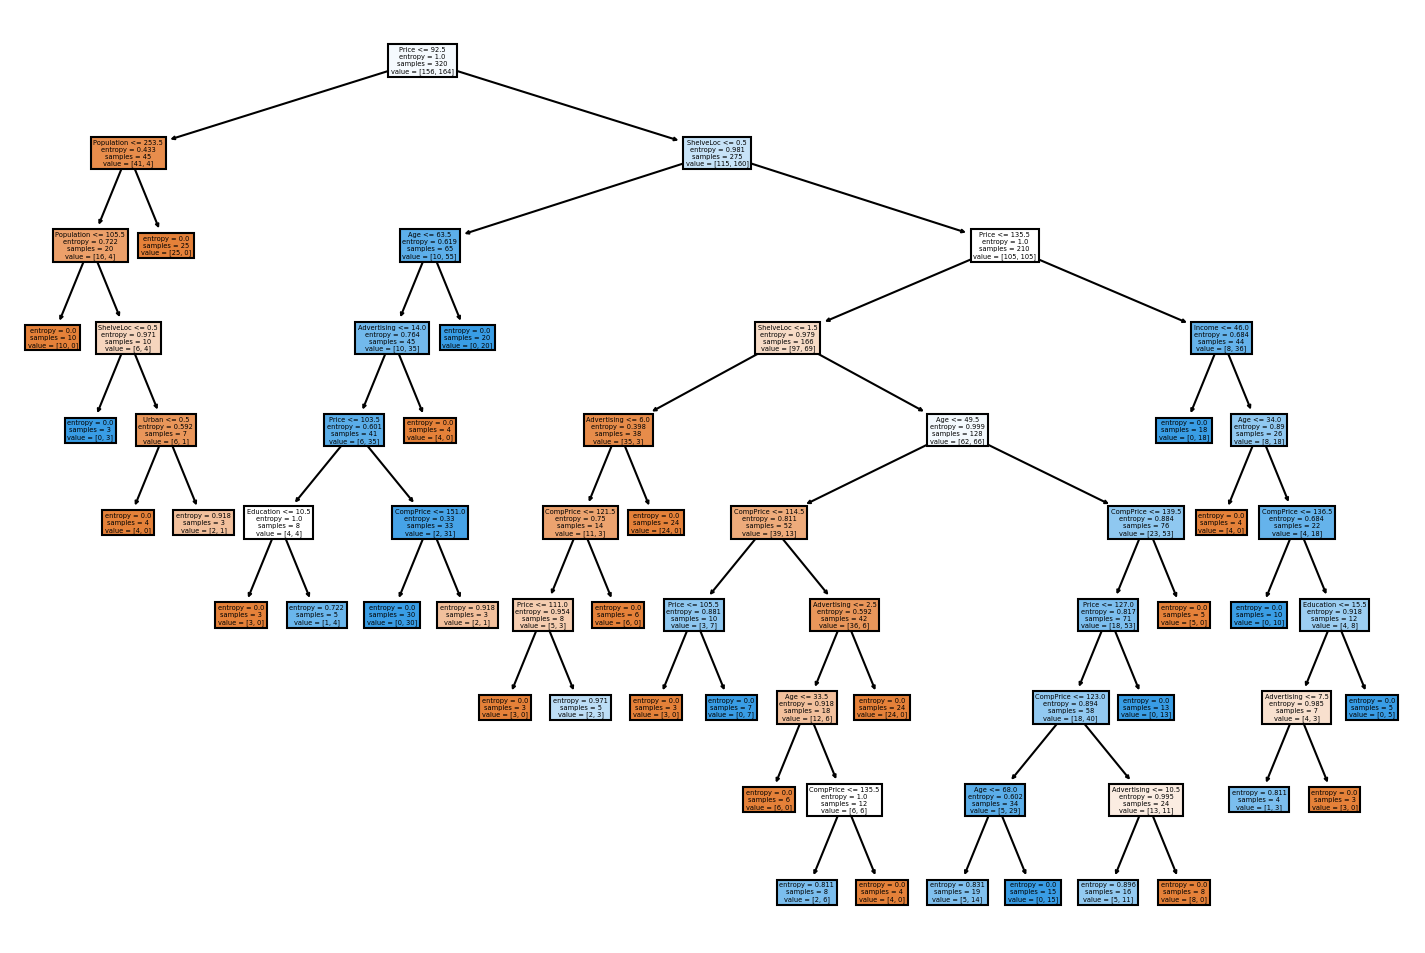

In [62]:
report_model(grid.best_estimator_)

In [63]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_leaf_nodes': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5]}


grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [64]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [65]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

Training Accuracy: 0.8469
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




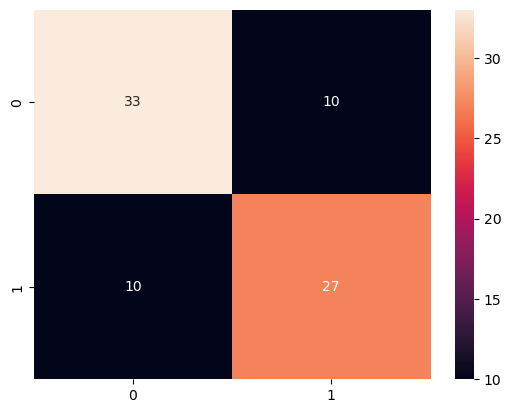

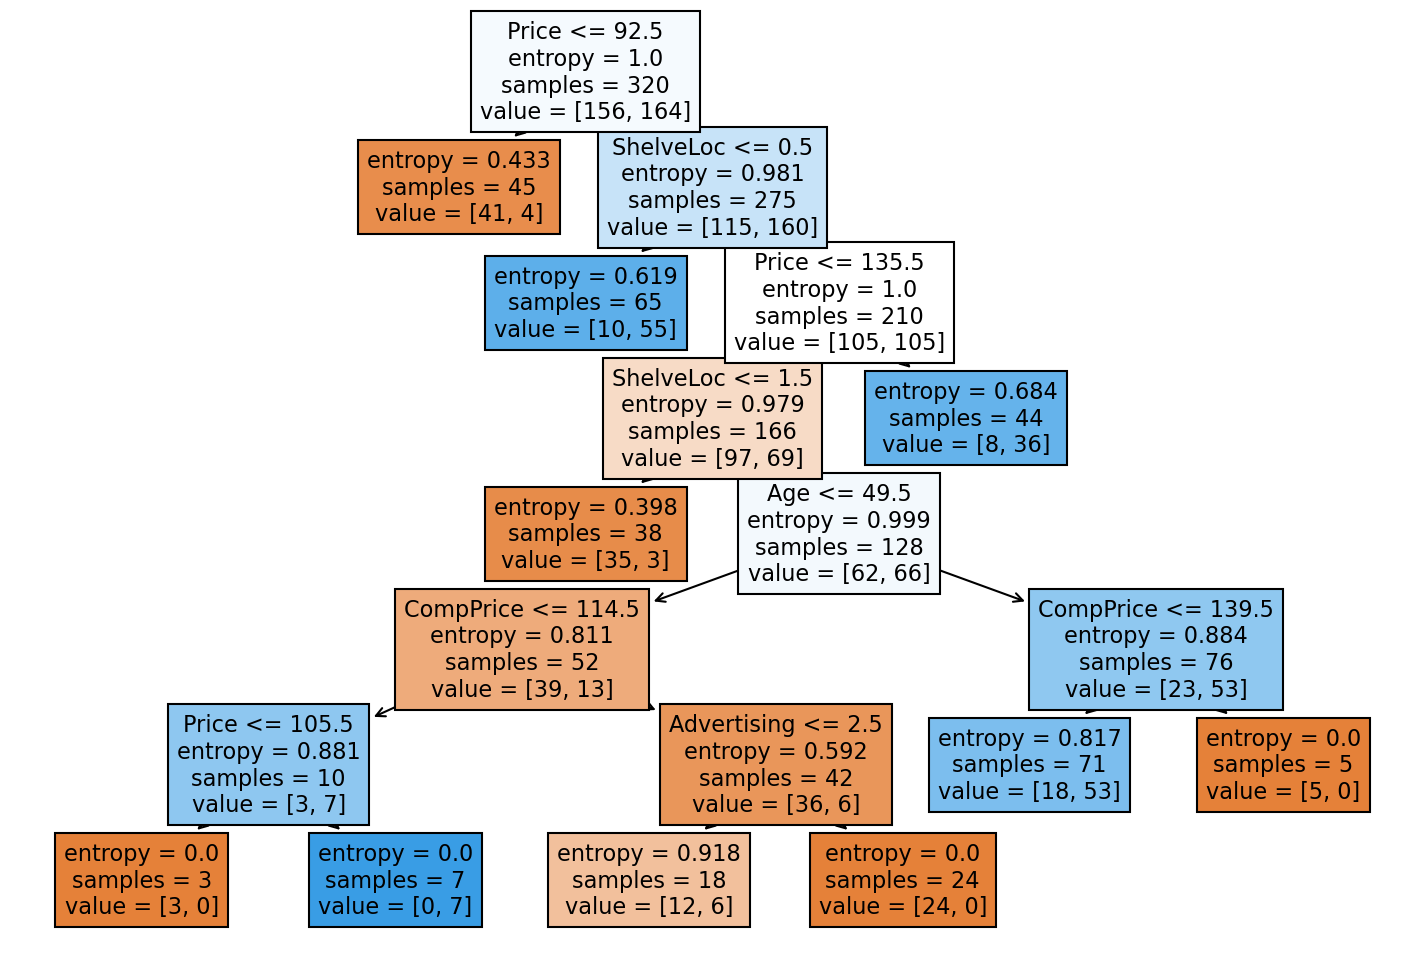

In [66]:
report_model(grid.best_estimator_)

# Cross Validation

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [69]:
grid_model = GridSearchCV(estimator=dtregmodel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [70]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [71]:
grid_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [72]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=10)

In [73]:
grid_pred = grid_model.predict(X_test)

In [74]:
grid_pred

array([0.        , 1.        , 0.05405405, 1.        , 0.69736842,
       1.        , 0.        , 0.6       , 0.05405405, 0.05405405,
       0.69736842, 0.69736842, 0.        , 0.25      , 0.91666667,
       0.25      , 0.91666667, 0.        , 0.25      , 0.69736842,
       0.        , 0.91666667, 0.33333333, 0.69736842, 1.        ,
       0.69736842, 0.69736842, 0.        , 0.25      , 0.91666667,
       0.05405405, 0.05405405, 0.69736842, 1.        , 0.05405405,
       0.69736842, 1.        , 0.69736842, 0.05405405, 1.        ,
       0.25      , 0.91666667, 0.        , 0.        , 0.42857143,
       0.69736842, 0.69736842, 0.        , 0.91666667, 0.69736842,
       0.        , 0.25      , 0.25      , 1.        , 0.25      ,
       1.        , 0.69736842, 0.05405405, 0.        , 0.05405405,
       0.05405405, 0.05405405, 0.6       , 0.91666667, 0.25      ,
       0.25      , 0.05405405, 0.25      , 0.25      , 0.05405405,
       0.91666667, 0.25      , 0.        , 1.        , 0.6    

# Retrain Model

In [75]:
dtc_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [76]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

Training Accuracy: 0.8469
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




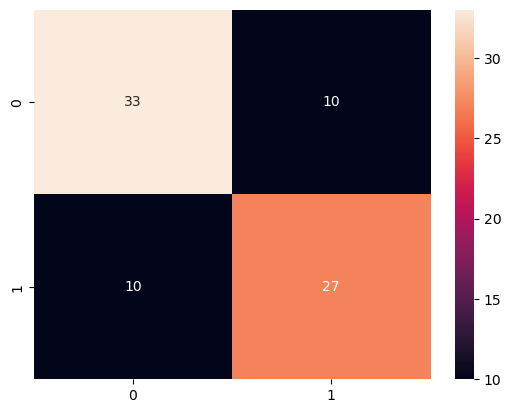

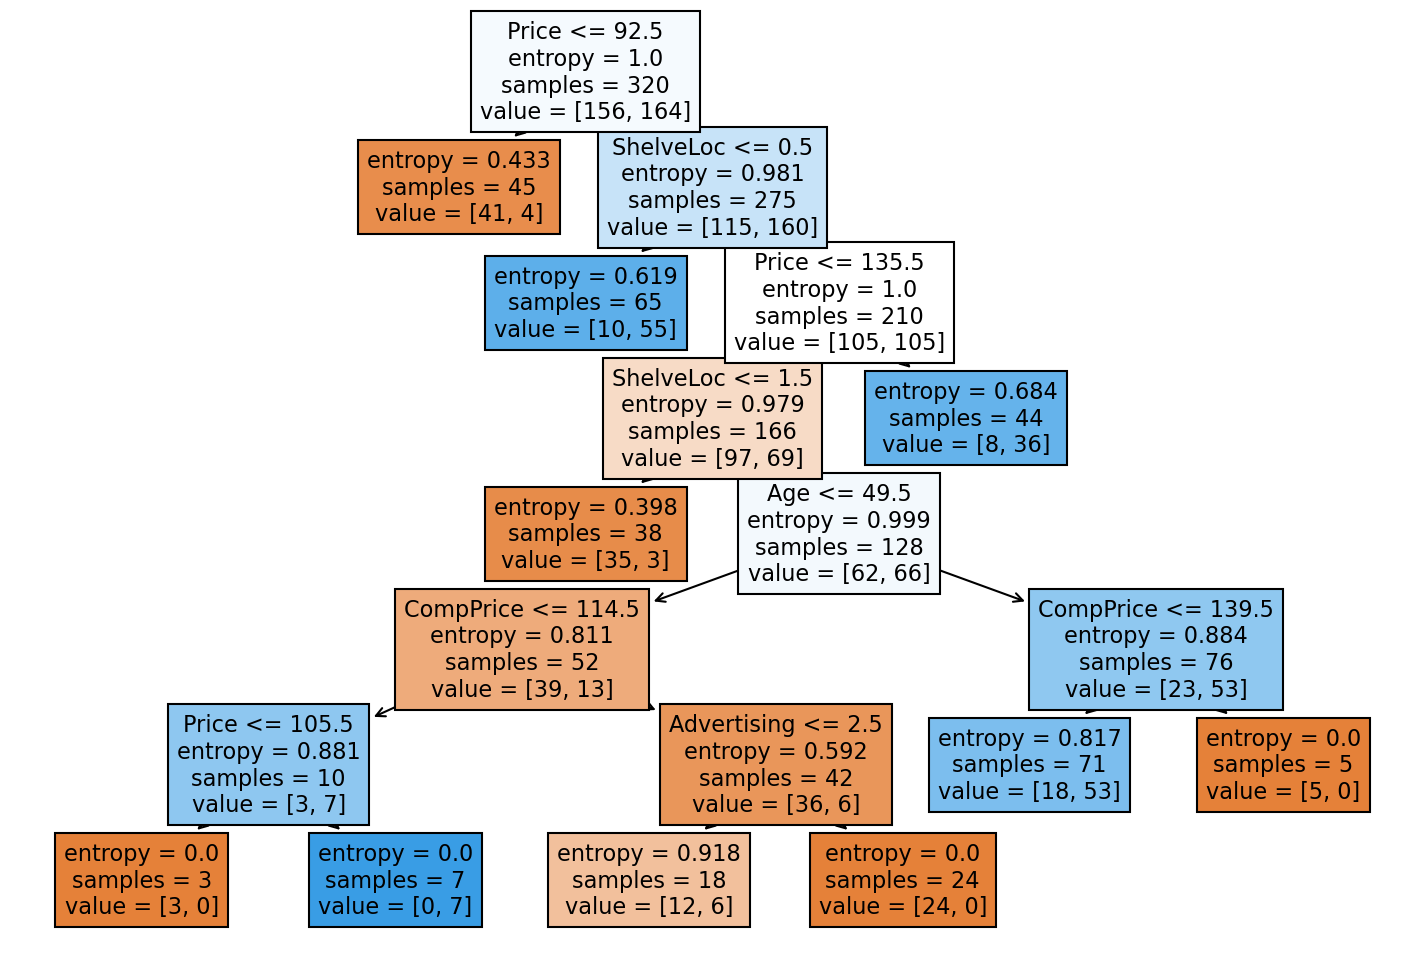

In [77]:
report_model(dtc_model)

# Model Deployment

In [78]:
# from joblib import dump,load

In [79]:
# dump(dtc_model, 'dtc_model.joblib')